### Question 2
You have 2 categories of training data which are audio files (in folders), and 2 audio files which are unlabeled. The categories
are 'CategoryA' and 'CategoryB' while the unknown ones are 'CategoryU'. The objective is to predict whether the audio files in CategoryU are 'A' or 'B'.

a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU.
They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure
the spectrograms (2x2 subplots). (3 points)

b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the
performance changes. (3 points)

c) Apply GMM to the periodograms of each training category. There are difierent ways to approach this and one is to
take the average periodogram and fit the GMM to it. Then use the GMM models to assess the labels of the CategoryU files.
(3 points)

d) Use the periodogram data to make predictions for 'U' this time using PCA. If there are too many dimensions you can
reduce the resolution by smoothing and then subsampling. From PCA take the 2 largest axis of variance and then project
each training data point on that space with dierent colored markers. Then project the 2 data from the 'U' files on that
space to provide a conclusion for the labels of 'U' les. (3 points)

e) Apply another approach to compare (eg. decision trees or random forests) to make a prediction. (3 points)

In [26]:
cd("C:/Work/Project/STA7722/Assignment/Assgn2")

In [2]:
import Pkg; 
#Pkg.add("DSP")
#Pkg.add("WAV")
#Pkg.add("ChemometricsTools")
#Pkg.add("NearestNeighbors")
#Pkg.add("findpeaks")

In [44]:
using DSP, WAV
using Plots
#using Winston
#using PyPlot
# using AbstractFFTs
using ChemometricsTools
# using Shapefile
using Images, ImageMagick
using NearestNeighbors

using StatsBase
using Distances
using Statistics
using Random
# using FFTW


In [28]:
#read files
Path_A = "./categoryA/"
fileWAV_A = readdir(Path_A)
Path_B = "./categoryB/"
fileWAV_B = readdir(Path_B)
Path_U = "./categoryU/"
fileWAV_U = readdir(Path_U)
println(size(fileWAV_A))
println(fileWAV_A)


(6,)
["DeeYanKey-Andante.wav", "background full (FREE DOWNLOAD)-1213771396.wav", "background music (FREE DOWNLOAD)-1219856890.wav", "hd audio background (FREE DOWNLOAD)-1213766218.wav", "play background (FREE DOWNLOAD)-1219852972.wav", "your background (FREE DOWNLOAD)-1219830094.wav"]


### a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU. They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure the spectrograms (2x2 subplots). (3 points)

In [29]:
A_signals = []
Fs_A = []
for filename in 1:length(fileWAV_A)
    ss, Fs = wavread(string(Path_A,fileWAV_A[filename]))
    ss = vec(ss)
    push!(A_signals,ss)
    push!(Fs_A,Fs)
end

In [30]:
B_signals = []
Fs_B = []
for filename in 1:length(fileWAV_B)
    ss, Fs = wavread(string(Path_B,fileWAV_B[filename]))
    ss = vec(ss)
    push!(B_signals,ss)
    push!(Fs_B,Fs)
end

In [31]:
U_signals = []
Fs_U = []
for filename in 1:length(fileWAV_U)
    ss, Fs = wavread(string(Path_U,fileWAV_U[filename]))
    ss = vec(ss)
    push!(U_signals,ss)
    push!(Fs_U,Fs)
end

In [32]:
size(B_signals[6])

(4182936,)

In [33]:
#Produce a spectrogram of the audio for one of each in Category A, B and both files in U
sampleInterval = 100
resolutionWin = 1000
smooth = 50
spgrmA1 = DSP.Periodograms.spectrogram(A_signals[1][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_A[1], window=DSP.Windows.hamming)
spgrmB1 = DSP.Periodograms.spectrogram(B_signals[6][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_B[1], window=DSP.Windows.hamming)
spgrmU1 = DSP.Periodograms.spectrogram(U_signals[1][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_U[1], window=DSP.Windows.hamming)
spgrmU2 = DSP.Periodograms.spectrogram(U_signals[2][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_U[2], window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64, AbstractFFTs.Frequencies{Float32}, Matrix{Float64}}([7.158628311692767e-13 1.3625254328406907e-7 … 6.424685864217548e-14 4.118427186546383e-13; 4.067601665056796e-12 1.3574115287967293e-7 … 1.5646974034011614e-13 4.535560540976692e-13; … ; 6.53350498519207e-12 9.46492734484808e-9 … 2.2056041329086447e-13 2.997503679708745e-14; 2.7729362696904896e-12 6.593817879285637e-9 … 3.497181230660633e-14 2.7022011080191496e-14], Float32[0.0, 44.1, 88.2, 132.29999, 176.4, 220.5, 264.59998, 308.69998, 352.8, 396.9  …  21653.1, 21697.2, 21741.299, 21785.398, 21829.5, 21873.6, 21917.7, 21961.799, 22005.898, 22050.0], 0.011337868480725623:0.021541950113378686:2.639455782312925)

### Plot the spectrogram

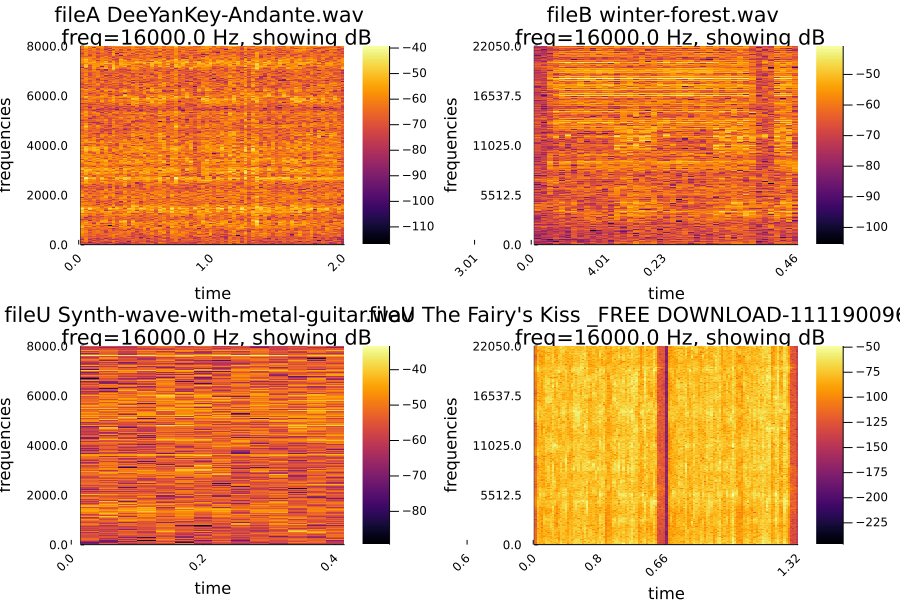

In [34]:
hmapA1 = heatmap( pow2db.(spgrmA1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmA1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmA1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmA1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmA1.time),length=5),digits=2)))  ,legend=true, 
     title="fileA $(fileWAV_A[1]) \n freq=$(Fs_A[1]) Hz, showing dB")
hmapB1 = heatmap( pow2db.(spgrmB1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmB1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmB1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmB1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmB1.time),length=5),digits=2)))  ,legend=true, 
     title="fileB $(fileWAV_B[6]) \n freq=$(Fs_B[6]) Hz, showing dB")
hmapU1 = heatmap( pow2db.(spgrmU1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU1.time),length=5),digits=2)))  ,legend=true, 
     title="fileU $(fileWAV_U[1]) \n freq=$(Fs_U[1]) Hz, showing dB")
hmapU2 = heatmap( pow2db.(spgrmU2.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU2.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU2.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU2.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU2.time),length=5),digits=2)))  ,legend=true, 
     title="fileU $(fileWAV_U[2]) \n freq=$(Fs_U[1]) Hz, showing dB")


pA1 = plot(hmapA1);pB1= plot(hmapB1);pU1= plot(hmapU1);pU2= plot(hmapU2)

p1 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2),size=(900,600))


savefig(p1,"figs/fig1Spectrogram.png")
display("image/png", p1) #p1

### Plot the periodogram

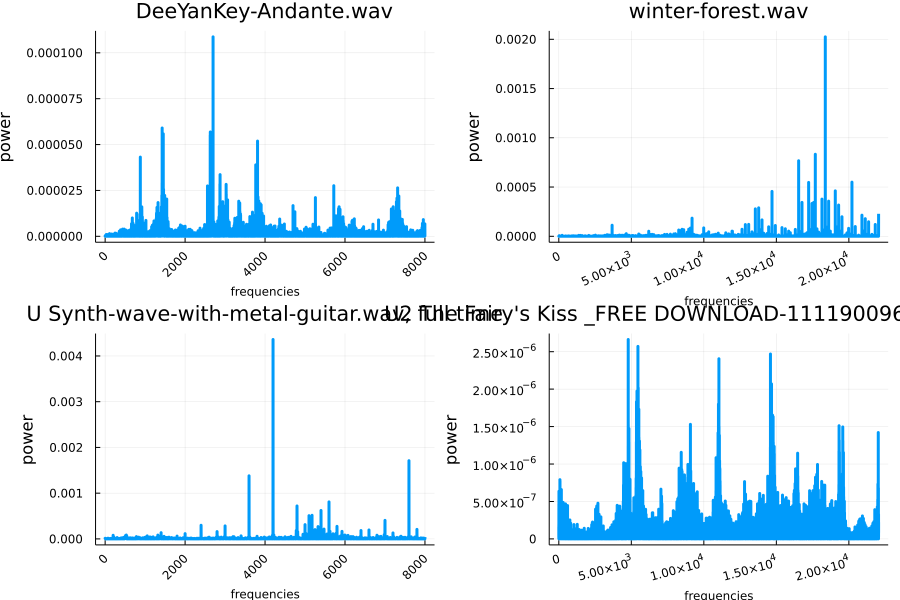

In [35]:
# plot the periodogram 
# power spectral density (PSD)

prdgrmFULLA1 = DSP.Periodograms.periodogram(A_signals[1][1:sampleInterval:end], fs=Fs_A[1], window=DSP.Windows.hamming)
pA1 = plot(prdgrmFULLA1.freq,prdgrmFULLA1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title=fileWAV_A[1])
prdgrmFULLB1 = DSP.Periodograms.periodogram(B_signals[6][1:sampleInterval:end], fs=Fs_B[2], window=DSP.Windows.hamming)
pB1 = plot(prdgrmFULLB1.freq,prdgrmFULLB1.power,legend=false,linewidth=3,xrotation=25,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title=fileWAV_B[6])
prdgrmFULLU1 = DSP.Periodograms.periodogram(U_signals[1][1:sampleInterval:end], fs=Fs_U[1], window=DSP.Windows.hamming)
pU1 = plot(prdgrmFULLU1.freq,prdgrmFULLU1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title="U $(fileWAV_U[1]), full time")
prdgrmFULLU2 = DSP.Periodograms.periodogram(U_signals[2][1:sampleInterval:end], fs=Fs_U[2], window=DSP.Windows.hamming)
pU2 = plot(prdgrmFULLU2.freq,prdgrmFULLU2.power,legend=false,linewidth=3,xrotation=15,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title="U2 $(fileWAV_U[2]), full time")
p2 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2),size=(900,600))

savefig(p2,"figs/songPeriodogramFULL")
display("image/png", p2) #p2

In [12]:
# COMPUTE (fast nufft of type-1):
# tol = 1e-10
# Ft = nufft1d1(collect(tn), st .- mean(st), +1, tol, M)
# freq = (-M÷2:M÷2-1)/t[end]

In [13]:
#Slice the frequencies of periodogram
#slice = 7
#sliceprdgrmA1 = prdgrmFULLA1.freq[:, slice]

# LinePeaksA1 = findpeaks(spgrmA1.power, min_dist=100)
# #LinePeaksA1 = findpeaks(prdgrmFULLA1.freq, m=100)
# #prdgrmFULLA1 = DSP.Periodograms.periodogram(A_signals[1][1:sampleInterval:end], fs=Fs_A[1], window=DSP.Windows.hamming)
# psA1 = plot(prdgrmFULLA1.freq,prdgrmFULLA1.power,legend=false,linewidth=3,xrotation=45,         
#                xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
#                 title="Sliced $(fileWAV_A[1])")
# vline!(LinePeaksA1, linewidth=1)
# display("image/png", psA1)
#FreqPeaksA = round.(maximum(Int.(round.(prdgrmFULLA1.freq)))*(LinePeaksA1 ./ length(sliceprdgrmA1)), digits=0);

In [14]:
# LinePeaksA1

In [36]:
#read all 6 files from Category A, Category B and find top 2 frequencies for all 12 files.
ss_ind = 1

top_frequencies = Array{Float64}(undef, 0, 2)
for ss_ind in 1:length(A_signals)

    prdgrm = DSP.Periodograms.periodogram(A_signals[ss_ind], fs=Int(Fs_A[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_A = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    prdgrm = DSP.Periodograms.periodogram(B_signals[ss_ind], fs=Int(Fs_B[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_B = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    #prdgrm = DSP.Periodograms.periodogram(dog_U[ss_ind], fs=Int(Fs_U[ss_ind]), window=DSP.Windows.hamming)
    #top_freqs_U = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    
    top_frequencies = vcat(top_frequencies,top_freqs_A',top_freqs_B') #,top_freqs_dog'
end

In [37]:
#read 2 U files and find top 2 frequencies
ss_ind = 1
top_frequencies_U = Array{Float64}(undef, 0, 2)
for ss_ind in 1:length(U_signals)
    
    prdgrm = DSP.Periodograms.periodogram(U_signals[ss_ind], fs=Int(Fs_U[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_U = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    top_frequencies_U = vcat(top_frequencies_U,top_freqs_U')
end

In [38]:
labels = repeat(["CA","CB"],length(A_signals)) #,"dog"
print(labels)

["CA", "CB", "CA", "CB", "CA", "CB", "CA", "CB", "CA", "CB", "CA", "CB"]

In [50]:
top_frequencies[:,:]

12×2 Matrix{Float64}:
 292.999   293.002
  63.9443   64.3732
 521.134   625.74
 148.499   146.997
 276.785   277.368
  85.6008   49.9342
 523.736   415.173
 261.715   261.718
 311.391   277.04
 293.866   195.86
  97.1759   97.3714
  66.6656   66.6695

### b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the performance changes. (3 points)

In [40]:
labels_U = repeat(["CU"],length(U_signals))
print(labels_U)

["CU", "CU"]

In [66]:
# identify index numbers for training and validation
Random.seed!(1)

function perclass_splits(y, percent)
    uniq_class = unique(y)
    keep_index = []
    for class in uniq_class
        class_index = findall(y .== class)
        row_index = randsubseq(class_index, percent)
        push!(keep_index, row_index...)
    end
    return keep_index
end

# identify index numbers for training and testing

Random.seed!(1)

index_train = perclass_splits(labels, 0.67)

index_valid = setdiff(1:length(labels), index_train)

5-element Vector{Int64}:
 2
 4
 5
 6
 9

In [70]:
# split data between training and validation

X_train = top_frequencies[index_train, :]

X_valid = top_frequencies[index_valid, :]

y_train = labels[index_train]

y_valid = labels[index_valid]

5-element Vector{String}:
 "CB"
 "CB"
 "CA"
 "CB"
 "CA"

In [71]:
#KNN ,labels
# identify index numbers for training and testing

# transpose data
X_train_t = permutedims(X_train)
X_valid_t = permutedims(X_valid)

# build tree
kdtree = KDTree(X_train_t)  #to arrange data for knn efficiently 

# run model
k = 3

index_knn, distances = knn(kdtree, X_valid_t, k, true)

#output_knn = [idxs dists]

([[7, 4, 6], [4, 7, 6], [5, 1, 6], [7, 4, 6], [1, 5, 6]], [[3.5607269886946784, 46.83188121806238, 264.8637041351807], [71.39186839165134, 114.6702925180686, 153.35939132795357], [21.72734198775588, 22.523024104879614, 83.27876490569638], [25.270760284426814, 48.8290386041729, 254.30049766128352], [24.352348407072437, 51.98584864414928, 83.04997413830782]])

In [75]:
# display output

output = [index_valid index_knn distances]
output


5×3 Matrix{Any}:
 2  [7, 4, 6]  [3.56073, 46.8319, 264.864]
 4  [4, 7, 6]  [71.3919, 114.67, 153.359]
 5  [5, 1, 6]  [21.7273, 22.523, 83.2788]
 6  [7, 4, 6]  [25.2708, 48.829, 254.3]
 9  [1, 5, 6]  [24.3523, 51.9858, 83.05]

In [81]:
# post-processing

index_knn_matrix = hcat(index_knn...)

index_knn_matrix_t = permutedims(index_knn_matrix)

knn_classes = y_train[index_knn_matrix_t]

# use StatsBase to make predictions

y_hat = [
    argmax(countmap(knn_classes[i, :]))
    for i in 1:length(y_valid)
]

# check accuracy

accuracy = mean(y_hat .== y_valid)

0.6

In [82]:
# display results

check = [y_hat[i] == y_valid[i] for i in 1:length(y_hat)]

check_display = [y_hat y_valid check]

5×3 Matrix{Any}:
 "CB"  "CB"   true
 "CB"  "CB"   true
 "CB"  "CA"  false
 "CB"  "CB"   true
 "CB"  "CA"  false

In [22]:
# typeof(data)
col_cat = repeat(["red","blue"],length(output_knn)) #,"green"
pp_train = scatter( [output_knn[:,1]],[output_knn[:,2]],legend=false,color=col_cat[1], markersize=8 )
f1_U = [top_frequencies[:,1][i] for i in idxs]
f2_U = [top_frequencies[:,2][i] for i in idxs]
for ii in 1:idxs
    [ (scatter!( pp_train,[output_knn[ii,1]], [output_knn[ii,2]], color=col_cat[ii], markersize=8 )) ]
end
# add test point to plot
scatter!( f1_knn, f2_knn, color="yellow", markersize=8 ) 
        
xlabel!("component1")
ylabel!("component2")
plot(pp_knn)

LoadError: UndefVarError: output_knn not defined

In [23]:
plot(pp)
scatter!( f1_knn, f2_knn, color="yellow", markersize=8 ) 

LoadError: UndefVarError: pp not defined